# ECON 220 Lab - Week 9

Justin S. Eloriaga

Today, our main goal is REPLICATION. This is a vital skill in economic research. One good way to learn is to be able to replicate past work and really understand what was going on. This is also usually done to check if codes or analysis done by other researchers were reasonably correct.

We will be using the classic example, probably one of the most read Economics papers of all time, Card and Krueger's paper on Minimum Wages. Feel free to read it here: https://davidcard.berkeley.edu/papers/njmin-aer.pdf  

Typical Econ Theory: When minimum wages go up, firms want to cut back, hence, employment is reduced. 

The abstract of Card and Krueger (1993): On April 1, 1992, New Jersey's minimum wage rose from $4.25 to $5.05 per
hour. To evaluate the impact of the law we surveyed 410 fast-food restaurants in
New Jersey and eastern Pennsylvania before and after the rise. Comparisons of
employment growth at stores in New Jersey and Pennsylvania (where the
minimum wage was constant) provide simple estimates of the effect of the higher
minimum wage. We also compare employment changes at stores in New Jersey
that were initially paying high wages (above $5) to the changes at lower-wage
stores. We find no indication that the rise in the minimum wage reduced
employment

As usual, let's start by importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's load the dataset

In [30]:
path = "/Users/justineloriaga/Documents/GitHub/ECON-220-Lab/Week 9/minwage_data.csv"
data = pd.read_csv(path)
data


,sheet,chain,co_owned,state,southj,centralj,northj,pa1,pa2,shore,...,firstin2,special2,meals2,open2r,hrsopen2,psoda2,pfry2,pentree2,nregs2,nregs112
0,46,1,0,0,0,0,0,1,0,0,...,0.08,1.0,2.0,6.5,16.5,1.03,NaN,0.94,4.0,4.0
1,49,2,0,0,0,0,0,1,0,0,...,0.05,0.0,2.0,10.0,13.0,1.01,0.89,2.35,4.0,4.0
2,506,2,1,0,0,0,0,1,0,0,...,0.25,NaN,1.0,11.0,11.0,0.95,0.74,2.33,4.0,3.0
3,56,4,1,0,0,0,0,1,0,0,...,0.15,0.0,2.0,10.0,12.0,0.92,0.79,0.87,2.0,2.0
4,61,4,1,0,0,0,0,1,0,0,...,0.15,0.0,2.0,10.0,12.0,1.01,0.84,0.95,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,423,2,1,1,0,0,1,0,0,0,...,0.50,0.0,1.0,11.0,11.0,1.05,0.84,2.32,3.0,2.0
406,424,2,1,1,0,0,1,0,0,0,...,0.50,0.0,1.0,11.0,14.0,1.05,0.94,2.32,5.0,3.0
407,426,3,1,1,0,0,1,0,0,0,...,0.25,1.0,2.0,6.0,18.0,1.11,1.05,1.05,6.0,5.0
408,427,4,0,1,0,0,1,0,0,0,...,NaN,1.0,2.0,10.5,12.5,1.11,1.09,2.07,2.0,2.0


Let me do some comands to clean this dataset. 

In [31]:
data = data.rename(columns={'status2':'status'})
long_panel_variables = [col for col in data.columns if not col.endswith('2')]
rename_dict = {col: col+'1' for col in long_panel_variables}
data.rename(columns=rename_dict, inplace=True)
data['id'] = data.reset_index(drop=True).index
data_long = pd.wide_to_long(data,
                          stubnames=long_panel_variables,
                          i='id',
                          j='period',
                          sep='').reset_index()
data_long = data_long.sort_values(by=['id','period']).reset_index(drop=True)
data_long[['state', 'status']] = data_long[['state', 'status']].ffill()
data_long

,id,period,date2,firstin2,pa2,special2,type2,sheet,chain,co_owned,...,meals,open,hrsopen,psoda,pfry,pentree,nregs,nregs11,status,open2r
0,0,1,111792,0.08,0,1.0,1,46.0,1.0,0.0,...,2.0,6.5,16.5,1.03,1.03,0.52,3.0,3.0,1.0,6.5
1,0,2,111792,0.08,0,1.0,1,NaN,NaN,NaN,...,2.0,NaN,16.5,1.03,NaN,0.94,4.0,4.0,1.0,NaN
2,0,111,111792,0.08,0,1.0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN
3,0,112,111792,0.08,0,1.0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN
4,1,1,111292,0.05,0,0.0,1,49.0,2.0,0.0,...,2.0,10.0,13.0,1.01,0.90,2.35,4.0,3.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,408,112,121792,NaN,0,1.0,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN
1636,409,1,111392,0.10,0,0.0,1,428.0,4.0,0.0,...,2.0,10.5,12.5,1.06,0.98,1.06,2.0,2.0,1.0,10.5
1637,409,2,111392,0.10,0,0.0,1,NaN,NaN,NaN,...,2.0,NaN,12.5,1.05,0.89,2.11,2.0,2.0,1.0,NaN
1638,409,111,111392,0.10,0,0.0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN


As we discussed last week, it is often good to use the codebook of most datasets as most things are coded numerically. This can be found here: https://davidcard.berkeley.edu/data_sets.html 

As you can see from the above dataframe, all the values are numeric. For the ease of analysis and readability, let's retrive the actual name of chains in `chain` column as well as the 'state' column.  

According to the codebook, 1 is Burger King, 2 is KFC, 3 is Roys, and 4 is Wendys. Then, we also know that 1 is NJ and 0 is PA.

![alt text](image.png)

In [33]:
data_long['chain'] = data_long['chain'].replace({1: 'BK', 2: 'KFC', 3: 'Roys', 4: 'Wendys'})
data_long['state'] = data_long['state'].replace({1: 'NJ', 0:'PA'})

### Replicating Table 1

I have placed a screenshot of Table 1 in the notebook. Let us try and see if we can replicate this.

![alt text](image-1.png)

Notice first in the dataset that there are two periods, period 1 (before the min wage increase) and period 2 (after the min wage increase). So, it is reasonable to create two datasets

In [34]:
before = data_long[data_long['period'] == 1].reset_index(drop=True)
after = data_long[data_long['period'] == 2].reset_index(drop=True)

Table 1 shows that 410 fast food restaurants answered the survey. Among 410 restaurants, 331 restaurants are in NJ and 79 are in PA

In [35]:
nj_count = before[before['state'] == 'NJ'].shape[0]
pa_count = before[before['state'] == 'PA'].shape[0]

print(f"Number of restaurants in NJ before: {nj_count}")
print(f"Number of restaurants in PA before: {pa_count}")

Number of restaurants in NJ before: 331
Number of restaurants in PA before: 79


Expect some replication tasks to be in the assignment.

Next, let us discuss more formal hypothesis tests. I got this material directly from Wonjun's class

Suppose $X \sim N(m,1)$ where $m$ is the unknown mean of the normal distribution.

Our best guess for $m$ is just simply the sample average
$$
\hat{m} = \bar{X} = \frac{1}{n} \sum_{i=1}^n X_i.
$$

We want to test if $m$ is different from 0 or not.

First, generate a random variable $X$ with `np.random.normal()`. For data generation, let $m=1$, but pretend we don't know this true $m$. Use sample size of $10$.

In [38]:
X = np.random.normal(loc=1, scale=1, size=10)
print(X)

[ 1.4177516   1.66222326  1.40635331  2.63365027  0.44485775  1.34984982
  1.18488823 -0.09503225 -0.0112408   1.21307213]


Using the simulated data, we can compute for the sample mean, which is the estimate $\hat{m}$

In [40]:
m_hat = np.mean(X)
print(f"The mean of X is: {mean_X}")

The mean of X is: 1.1206373308140987


Let us formalize the process behind a hypothesis test. Supppose your friend guesses that the true mean $m$ is 0. We can now formulate the null and alternative hypotheses below.

$$H_0:m = 0$$
$$H_a: m \neq 0$$

Under the null hypothesis $H_0$, each $X_i$ follows $N(m,1)$. Then, 

$$X_1 + X_2 + X_3 + \cdots + X_{10} \sim N(m, 1+1+1+\cdots+1) = N(m,10)$$
and
$$
\hat{m} = \frac{1}{10} \sum_{i=1}^{10} X_i \sim \frac{1}{10} N(m, 10) = N(m, \frac{1}{10}).$$

The intuition behind the hypothesis testing is as follow:

1. We don't know the underlying distribution. In our example, we don't know $m$ in $N(m,1)$.
2. Therefore, we make an assumption on the underlying distribution: $m = 0$, hypothetically. The assumptions we want to make can vary depending on the problem at hand.
3. Under the hypothesis ($m_0=0$, to denote "hypothetical" $m$.), see how extreme our observation is.
4. Claim the hypothesis ($m_0=0$) is wrong if our observation is too extreme in the distribution. If it doesn't look too crazy, then we don't have enough statistical evidence to claim that the hypothesis is wrong.

Before introducing a real test, let's see how extreme our observation is. To this end, let's draw a pdf of $N(m,1/10)$ under two different hypothesis: $m_0=0$, $m_0=1$. 

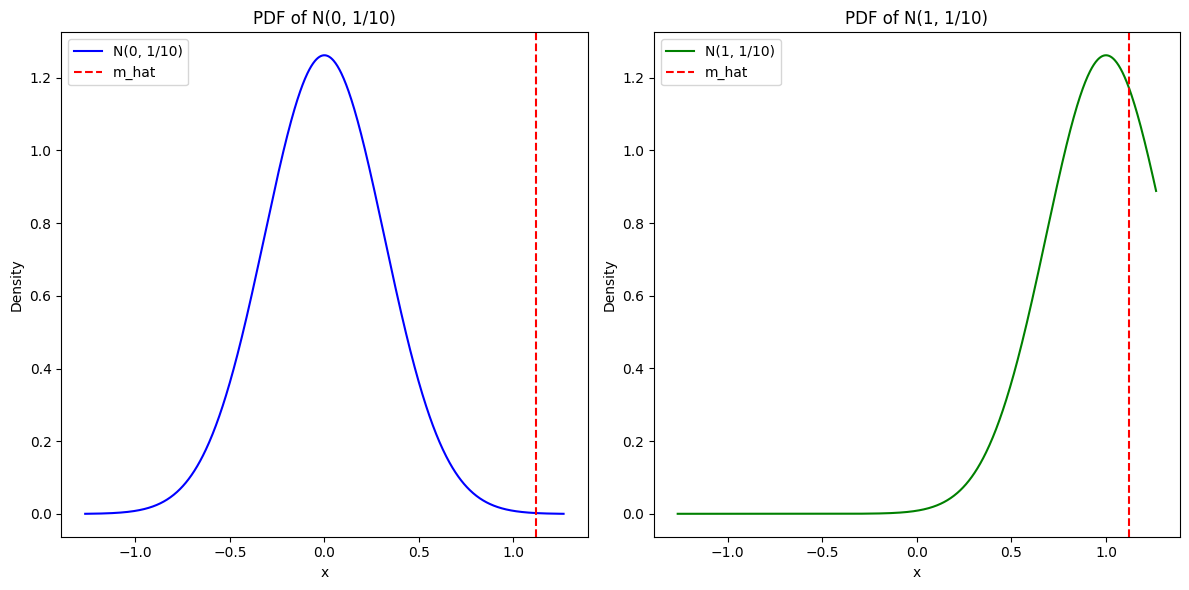

In [43]:
from scipy.stats import norm

import matplotlib.pyplot as plt

# Calculate the PDF for N(0, 1/10) and N(1, 1/10)
pdf_0 = norm.pdf(x, loc=0, scale=std_dev)
pdf_1 = norm.pdf(x, loc=1, scale=std_dev)

# Plot the PDFs
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot N(0, 1/10)
axes[0].plot(x, pdf_0, label='N(0, 1/10)', color='blue')
axes[0].axvline(m_hat, color='red', linestyle='--', label='m_hat')
axes[0].set_title('PDF of N(0, 1/10)')
axes[0].set_xlabel('x')
axes[0].set_ylabel('Density')
axes[0].legend()

# Plot N(1, 1/10)
axes[1].plot(x, pdf_1, label='N(1, 1/10)', color='green')
axes[1].axvline(m_hat, color='red', linestyle='--', label='m_hat')
axes[1].set_title('PDF of N(1, 1/10)')
axes[1].set_xlabel('x')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.tight_layout()
plt.show()

Our best guess of the mean $\hat{m}$ (red line) doesn't make sense at all on the left figure, but not crazy enough on the right.

To test the hypothesis, we can work with the distribution of $\hat{m}$ directly. However, we can define an unified test statistic that can be used in many different testings. This is particularly useful when we want to appeal to CLT when the underlying distribution is completely unknown (we assumed in this example the underlying distribution is a normal distribution with known standard deviation. In reality, we don't know neither the distribution is "normal" nor the standard deviation is "1").

Define
$$
Z = \frac{\hat{m} - m_0}{\sigma(m)}.
$$
Recall $m_0$ is the hyptothetical value. $\sigma(m)$ is 0.1 (i.e. 1/10) in our example, but can be estimated when we don't know the underlying distribution. Notice we can calculate $Z$ only when we assume a value for $m_0$.

Thanks to CLT, if the null hypothesis is correct (hypothesis on $m_0$ is correct), $Z$ is known to follow $N(0,1)$. Now we want to know how extreme our $Z$ is under the hypothesis. Note under differnt hypothesis, $Z$ changes but $N(0,1)$ remains.

In [44]:
# Define Z (where m_0 = 0)
Z = (m_hat - 0)/np.sqrt(0.1)
Z

np.float64(3.5437663963841457)

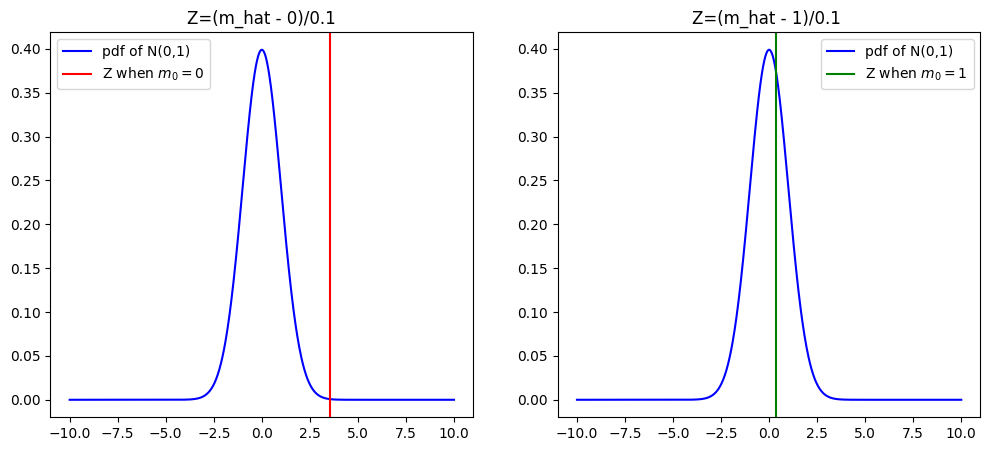

In [48]:
import scipy as sc
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(12,5))

# draw pdf of N(0,1)
x_grid = np.linspace(-10, 10, 1000)  # generate x_grid
y = sc.stats.norm.pdf(x_grid, loc=0, scale=np.sqrt(1))     # calculate the values of the pdf function.
ax[0].plot(x_grid,y, color='blue', label='pdf of N(0,1)')  # plot line graph
ax[0].axvline(Z, color='red', label='Z when $m_0=0$') # draw a vertical line at $m_hat$
ax[0].title.set_text('Z=(m_hat - 0)/0.1')
ax[0].legend()

# draw pdf of N(0,1)
ax[1].plot(x_grid, sc.stats.norm.pdf(x_grid), color='blue', label='pdf of N(0,1)')
ax[1].axvline((m_hat - 1)/np.sqrt(0.1), color='green', label='Z when $m_0=1$')  # notice Z is redefiend with m0=2.5
ax[1].title.set_text('Z=(m_hat - 1)/0.1 ')
ax[1].legend()

plt.show()

To define "how extreme" or "too crazy" formally, we set a critical value. If our test statistic $Z$ is far from $0$ (the center of $N(0,1)$) more than a critical value ($|Z - 0| > cv$), we agree it is too crazy and reject the null hypothesis.

For 95% significance level, our critical value for normal distribution is $1.96$ (you will learn this again in the main class). Reject the null if the distance is greater than 1.96. Use the absolute value (`np.abs()`) of $Z$ to calculate the distance and reject the null if it is greater than 1.96.

In [47]:
alpha = 0.05 # significance level
cv = sc.stats.norm.ppf(1 - alpha/2)  # critical value
cv

np.float64(1.959963984540054)

Since $Z = 3.54 > cv = 1.96$, we can conclude that we reject $H_0$ that $m = 0$, as such, there is sufficient evidence to show that $m$ is probably not equal to zero

What about when $m_0 = 1$?

In [49]:
(m_hat - 1)/np.sqrt(0.1)

np.float64(0.3814887362157666)

Here, we see that $Z = 0.38 < cv = 1.96$. We cannot conclude that $H_0$ is incorrect. As such, there is considerable evidence to show that $m$ is equal to 1

Let us now apply this Hypothesis testing to the Card and Kreuger. Let's show the main conclusion of the paper

In [50]:
df = pd.read_csv('/Users/justineloriaga/Documents/GitHub/ECON-220-Lab/Week 9/minwage_data.csv')
df = df[['state', 'status2',
         'empft', 'emppt', 'nmgrs', 
         'empft2', 'emppt2', 'nmgrs2']]
df = df.rename(columns={'status2':'status'})
long_panel_variables = [col for col in df.columns if not col.endswith('2')]
rename_dict = {col: col+'1' for col in long_panel_variables}
df.rename(columns=rename_dict, inplace=True)
df['id'] = df.reset_index(drop=True).index
df_long = pd.wide_to_long(df,
                          stubnames=long_panel_variables,
                          i='id',
                          j='period',
                          sep='').reset_index()
df_long = df_long.sort_values(by=['id','period']).reset_index(drop=True)
df_long[['state', 'status']] = df_long[['state', 'status']].ffill()
df_long['FTE'] = df_long['empft'] + df_long['nmgrs'] + 0.5*df_long['emppt']
df_long.head(5)

,id,period,state,status,empft,emppt,nmgrs,FTE
0,0,1,0.0,1.0,30.0,15.0,3.0,40.50
1,0,2,0.0,1.0,3.5,35.0,3.0,24.00
2,1,1,0.0,1.0,6.5,6.5,4.0,13.75
3,1,2,0.0,1.0,0.0,15.0,4.0,11.50
4,2,1,0.0,1.0,3.0,7.0,2.0,8.50


The variable FTE measures the total number of hours worked in the week, a sum of the part time and full time hours as well as overtime or net margins.

In [51]:
from scipy.stats import ttest_ind
NJ_pre = df_long[(df_long.state==1)&(df_long.period==1)]['FTE'].dropna()
PA_pre = df_long[(df_long.state==0)&(df_long.period==1)]['FTE'].dropna()
ttest_ind(NJ_pre, PA_pre)

TtestResult(statistic=np.float64(-2.3506288547303993), pvalue=np.float64(0.01923145102042417), df=np.float64(396.0))

In [53]:
reject = (ttest_ind(NJ_pre, PA_pre).pvalue <= 0.05)
reject

np.True_

As the paper argues, there is no decline in hours estimated, suggesting that the imposition of the minimum wage did not affect employment